In [176]:
cd /kaggle/input/b-data

/kaggle/input/b-data


In [177]:
#importing required libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px
# warnings
import warnings 
warnings.filterwarnings('ignore')

In [178]:
train = pd.read_csv("train.csv")
train

,Proposal_ID,Town_Code,Location_Code,House_Type,Proposed_Insurance_Type,Max_Age,Min_Age,Whether_Spouse,Health_Benchmark,Policy_Holding_Duration,Policy_Holding_Type,Proposed_Health_Insurance_Category,Proposed_Health_Insurance_Premium,Proposal_Acceptance_Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2,2.0,16,28179.2,1


In [179]:
train.shape

(50882, 14)

In [180]:
# replacing the 14+ value to 14 in Policy_Holding_Duration column
train["Policy_Holding_Duration"] = train["Policy_Holding_Duration"].replace('14+', 14)        
train["Policy_Holding_Duration"].value_counts()

1     4499
14    4335
2     4260
3     3586
4     2771
5     2362
6     1894
7     1645
8     1316
9     1114
10     813
11     546
12     513
13     511
14     466
Name: Policy_Holding_Duration, dtype: int64

In [181]:
train.dtypes

Proposal_ID                             int64
Town_Code                              object
Location_Code                           int64
House_Type                             object
Proposed_Insurance_Type                object
Max_Age                                 int64
Min_Age                                 int64
Whether_Spouse                         object
Health_Benchmark                       object
Policy_Holding_Duration                object
Policy_Holding_Type                   float64
Proposed_Health_Insurance_Category      int64
Proposed_Health_Insurance_Premium     float64
Proposal_Acceptance_Response            int64
dtype: object

In [182]:
train.columns

Index(['Proposal_ID', 'Town_Code', 'Location_Code', 'House_Type',
       'Proposed_Insurance_Type ', 'Max_Age', 'Min_Age', 'Whether_Spouse',
       'Health_Benchmark', 'Policy_Holding_Duration', 'Policy_Holding_Type',
       'Proposed_Health_Insurance_Category',
       'Proposed_Health_Insurance_Premium', 'Proposal_Acceptance_Response'],
      dtype='object')

In [183]:
cols=['Proposal_ID', 'Town_Code', 'Location_Code', 'House_Type',
       'Proposed_Insurance_Type ','Whether_Spouse',
       'Health_Benchmark', 'Policy_Holding_Type','Proposal_Acceptance_Response']

In [184]:
train[cols]=train[cols].astype('category')

In [185]:
train.dtypes

Proposal_ID                           category
Town_Code                             category
Location_Code                         category
House_Type                            category
Proposed_Insurance_Type               category
Max_Age                                  int64
Min_Age                                  int64
Whether_Spouse                        category
Health_Benchmark                      category
Policy_Holding_Duration                 object
Policy_Holding_Type                   category
Proposed_Health_Insurance_Category       int64
Proposed_Health_Insurance_Premium      float64
Proposal_Acceptance_Response          category
dtype: object

In [186]:
# converting Policy_Holding_Duration object data type into float
train["Policy_Holding_Duration"] = train["Policy_Holding_Duration"].astype('float')

In [187]:
train.dtypes

Proposal_ID                           category
Town_Code                             category
Location_Code                         category
House_Type                            category
Proposed_Insurance_Type               category
Max_Age                                  int64
Min_Age                                  int64
Whether_Spouse                        category
Health_Benchmark                      category
Policy_Holding_Duration                float64
Policy_Holding_Type                   category
Proposed_Health_Insurance_Category       int64
Proposed_Health_Insurance_Premium      float64
Proposal_Acceptance_Response          category
dtype: object

In [188]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Max_Age,50882.0,44.856275,17.310271,18.0,28.0,44.0,59.0,75.0
Min_Age,50882.0,42.738866,17.319375,16.0,27.0,40.0,57.0,75.0
Policy_Holding_Duration,30631.0,6.015246,4.501648,1.0,2.0,5.0,9.0,14.0
Proposed_Health_Insurance_Category,50882.0,15.115188,6.340663,1.0,12.0,17.0,20.0,22.0
Proposed_Health_Insurance_Premium,50882.0,14183.950069,6590.074873,2280.0,9248.0,13178.0,18096.0,43350.4


In [189]:
train.duplicated().sum()

0

In [190]:
train["Proposal_Acceptance_Response"].value_counts(normalize = True)*100

0    76.005267
1    23.994733
Name: Proposal_Acceptance_Response, dtype: float64

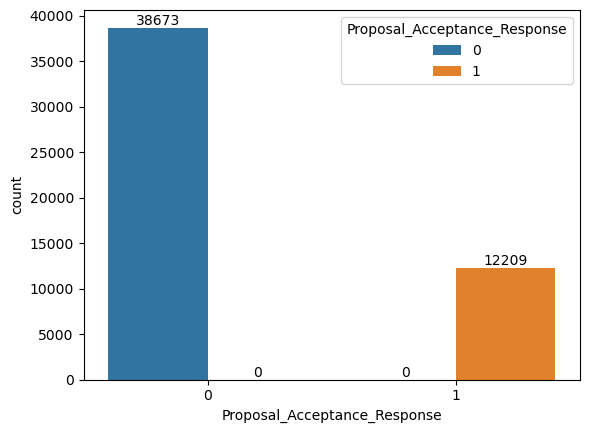

In [191]:
# create count plot
ax = sns.countplot(x="Proposal_Acceptance_Response", hue = "Proposal_Acceptance_Response", data=train)

# add numbers on top of bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# display plot
plt.show()

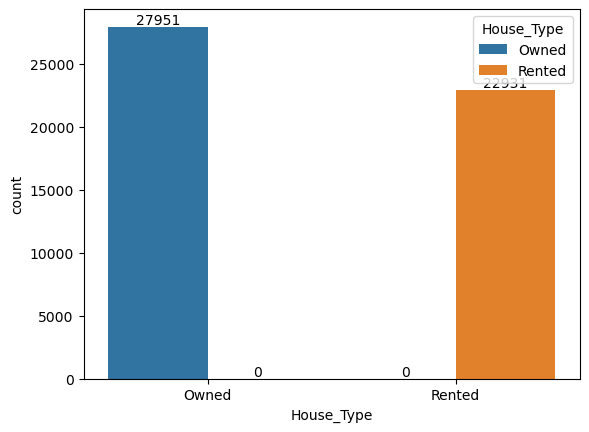

In [192]:
# create count plot
ax = sns.countplot(x="House_Type", hue = "House_Type", data=train)

# add numbers on top of bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# display plot
plt.show()

In [193]:
train["Policy_Holding_Type"].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Policy_Holding_Type, dtype: int64

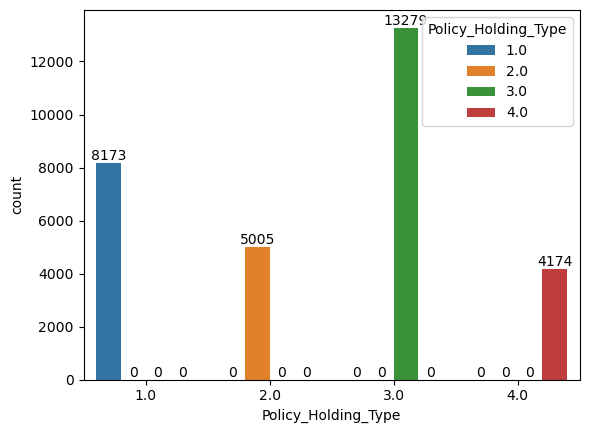

In [194]:
# create count plot
sns.countplot(x="Policy_Holding_Type", hue = "Policy_Holding_Type", data=train)

# add numbers on top of bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# display plot
plt.show()

In [195]:
import missingno as msno

<AxesSubplot:>

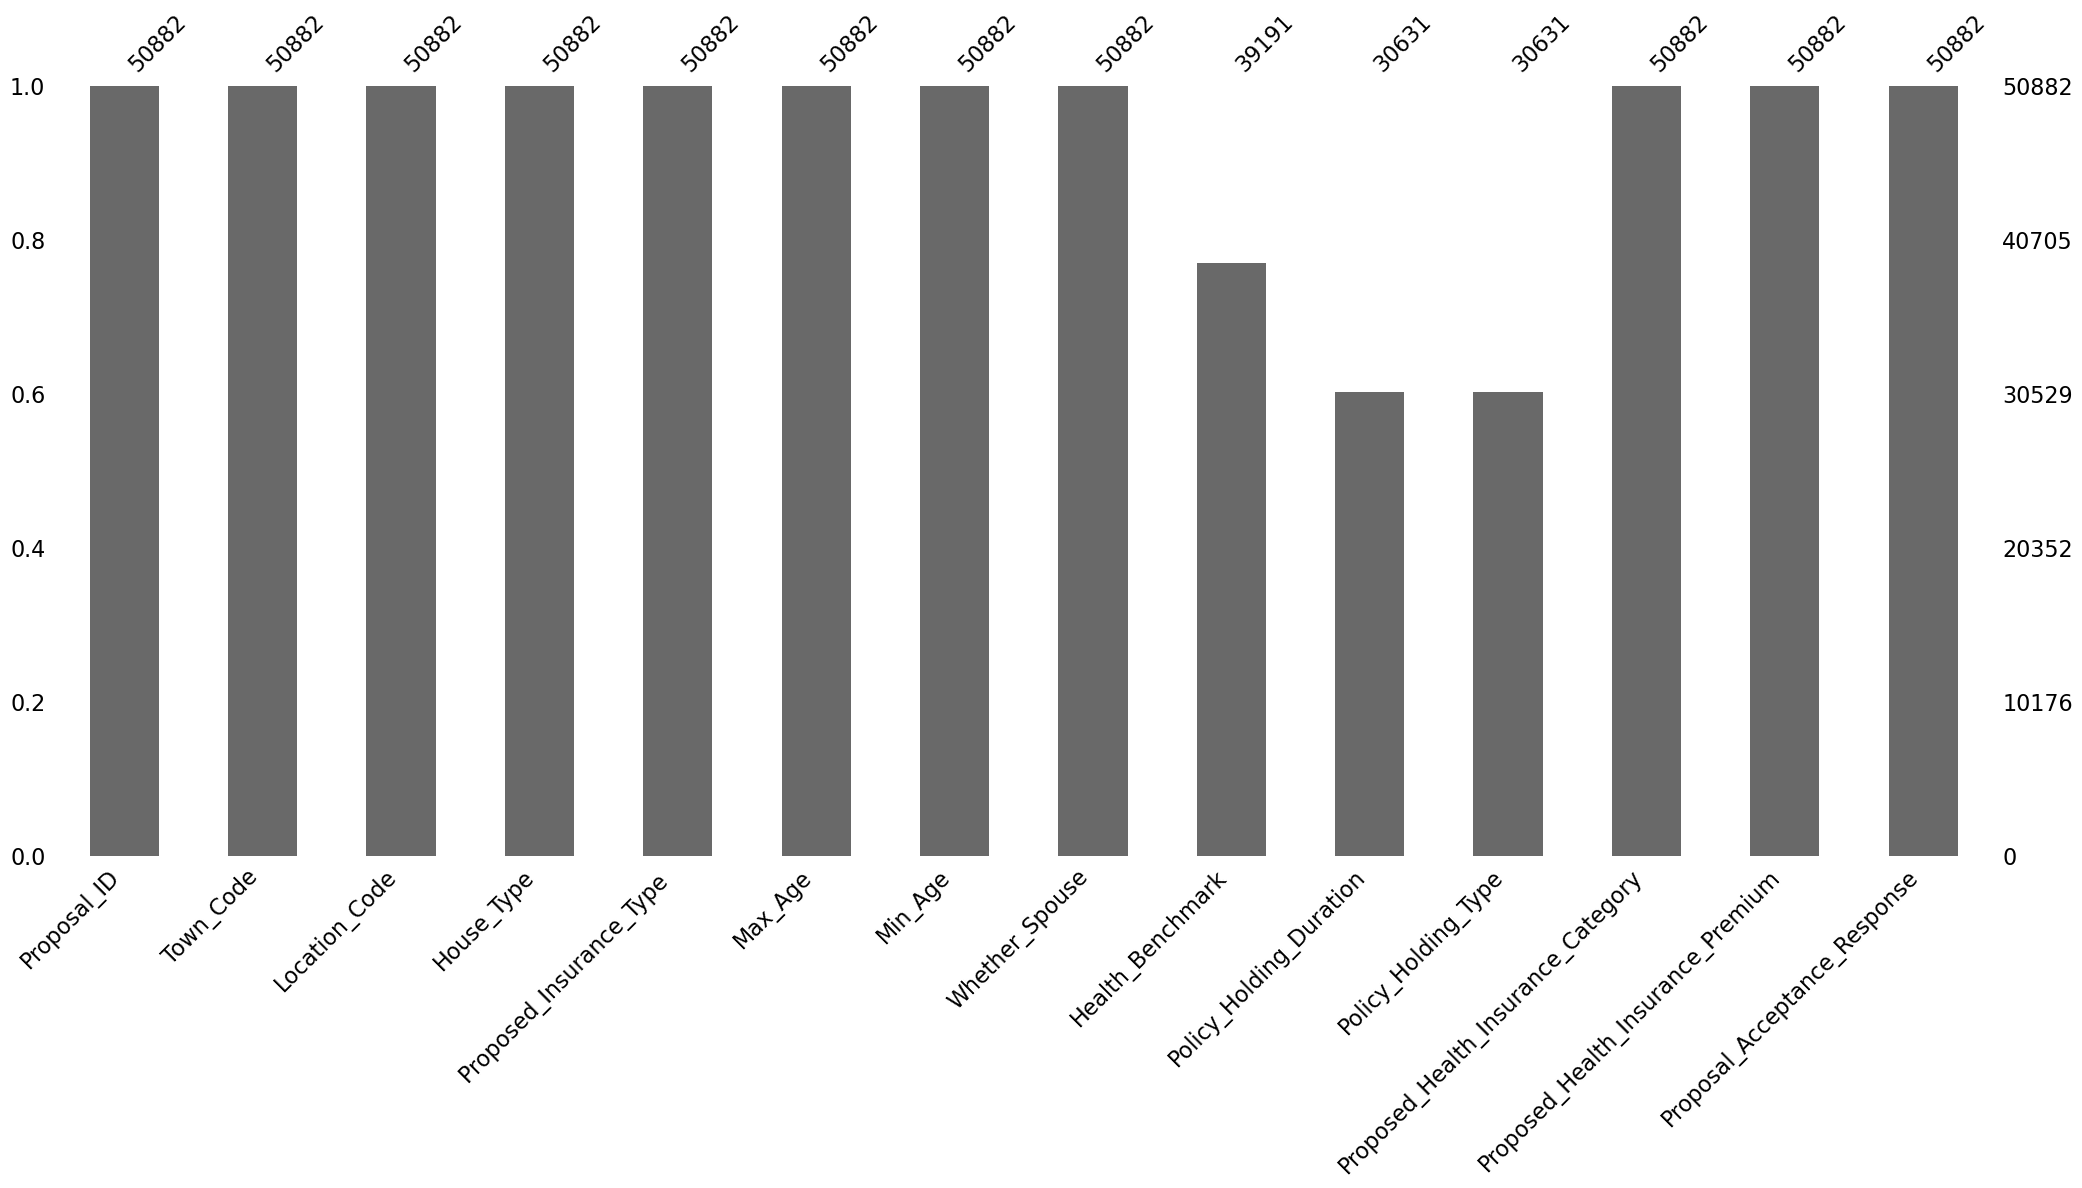

In [196]:
msno.bar(train)

In [197]:
nulls = train.isnull().sum()*100/len(train)
nulls = nulls.round(2)
nulls

Proposal_ID                            0.00
Town_Code                              0.00
Location_Code                          0.00
House_Type                             0.00
Proposed_Insurance_Type                0.00
Max_Age                                0.00
Min_Age                                0.00
Whether_Spouse                         0.00
Health_Benchmark                      22.98
Policy_Holding_Duration               39.80
Policy_Holding_Type                   39.80
Proposed_Health_Insurance_Category     0.00
Proposed_Health_Insurance_Premium      0.00
Proposal_Acceptance_Response           0.00
dtype: float64

In [198]:
from scipy.stats import chi2_contingency

In [199]:
insignificant_columns = []
for column in train.columns:
    contingency_table = pd.crosstab(train[column], train["Proposal_Acceptance_Response"])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    if p_value > 0.05: # Check if p-value is greater than 0.05
        insignificant_columns.append(column)

In [200]:
print(insignificant_columns)

['Proposal_ID', 'Town_Code', 'Location_Code', 'House_Type', 'Whether_Spouse', 'Health_Benchmark', 'Policy_Holding_Type', 'Proposed_Health_Insurance_Premium']


## Dropping the columns based on Insignificant Columns (p>0.05)

In [201]:
train.columns

Index(['Proposal_ID', 'Town_Code', 'Location_Code', 'House_Type',
       'Proposed_Insurance_Type ', 'Max_Age', 'Min_Age', 'Whether_Spouse',
       'Health_Benchmark', 'Policy_Holding_Duration', 'Policy_Holding_Type',
       'Proposed_Health_Insurance_Category',
       'Proposed_Health_Insurance_Premium', 'Proposal_Acceptance_Response'],
      dtype='object')

In [202]:
train.drop(['Proposal_ID','Town_Code', 'Location_Code', 'Health_Benchmark', 'Policy_Holding_Type', 'Proposed_Health_Insurance_Premium'],axis =1, inplace = True)
train.head()

,House_Type,Proposed_Insurance_Type,Max_Age,Min_Age,Whether_Spouse,Policy_Holding_Duration,Proposed_Health_Insurance_Category,Proposal_Acceptance_Response
0,Rented,Individual,36,36,No,14.0,22,0
1,Owned,Joint,75,22,No,NaN,22,0
2,Owned,Individual,32,32,No,1.0,19,1
3,Owned,Joint,52,48,No,14.0,19,0
4,Rented,Individual,44,44,No,3.0,16,0


In [203]:
train.shape

(50882, 8)

<AxesSubplot:>

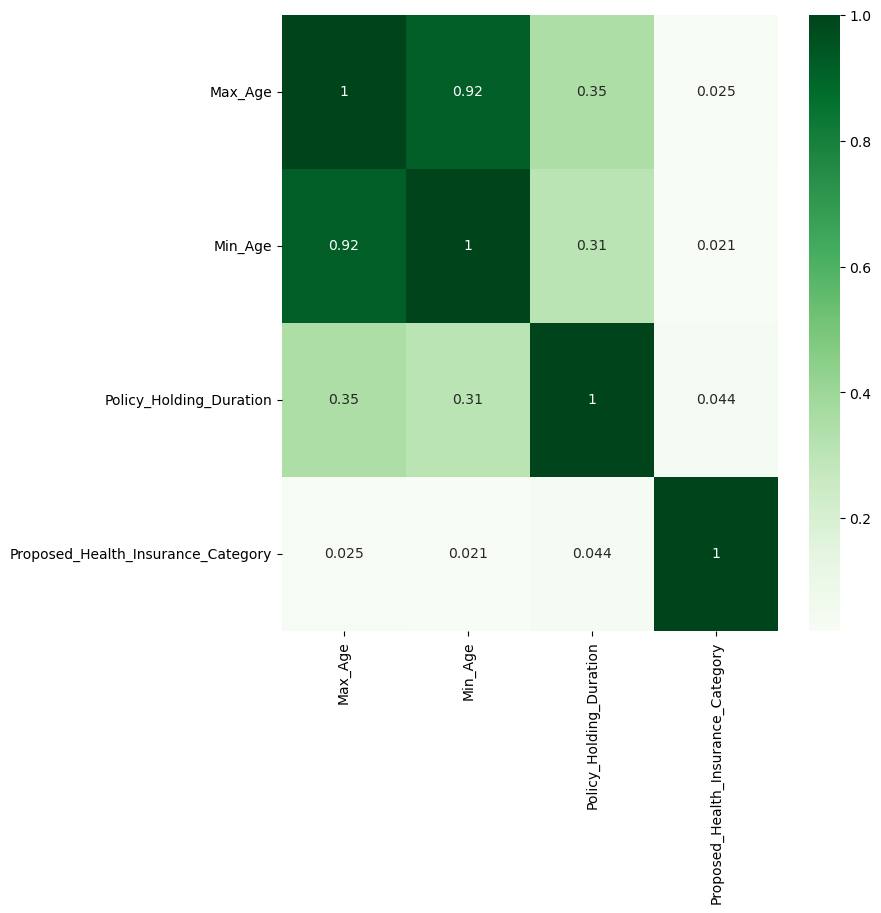

In [204]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(train.corr(), annot = True, cmap = "Greens", ax=ax)

## Dropping the columns based on coorelation

In [205]:
train.drop(["Min_Age"],axis = 1, inplace = True)
train.head()

,House_Type,Proposed_Insurance_Type,Max_Age,Whether_Spouse,Policy_Holding_Duration,Proposed_Health_Insurance_Category,Proposal_Acceptance_Response
0,Rented,Individual,36,No,14.0,22,0
1,Owned,Joint,75,No,NaN,22,0
2,Owned,Individual,32,No,1.0,19,1
3,Owned,Joint,52,No,14.0,19,0
4,Rented,Individual,44,No,3.0,16,0


In [206]:
train.shape

(50882, 7)

In [207]:
train.columns

Index(['House_Type', 'Proposed_Insurance_Type ', 'Max_Age', 'Whether_Spouse',
       'Policy_Holding_Duration', 'Proposed_Health_Insurance_Category',
       'Proposal_Acceptance_Response'],
      dtype='object')

In [208]:
num_cols = ["Max_Age","Policy_Holding_Duration","Proposed_Health_Insurance_Category"]
cat_cols = ["Proposed_Insurance_Type ","House_Type","Whether_Spouse"]

<AxesSubplot:>

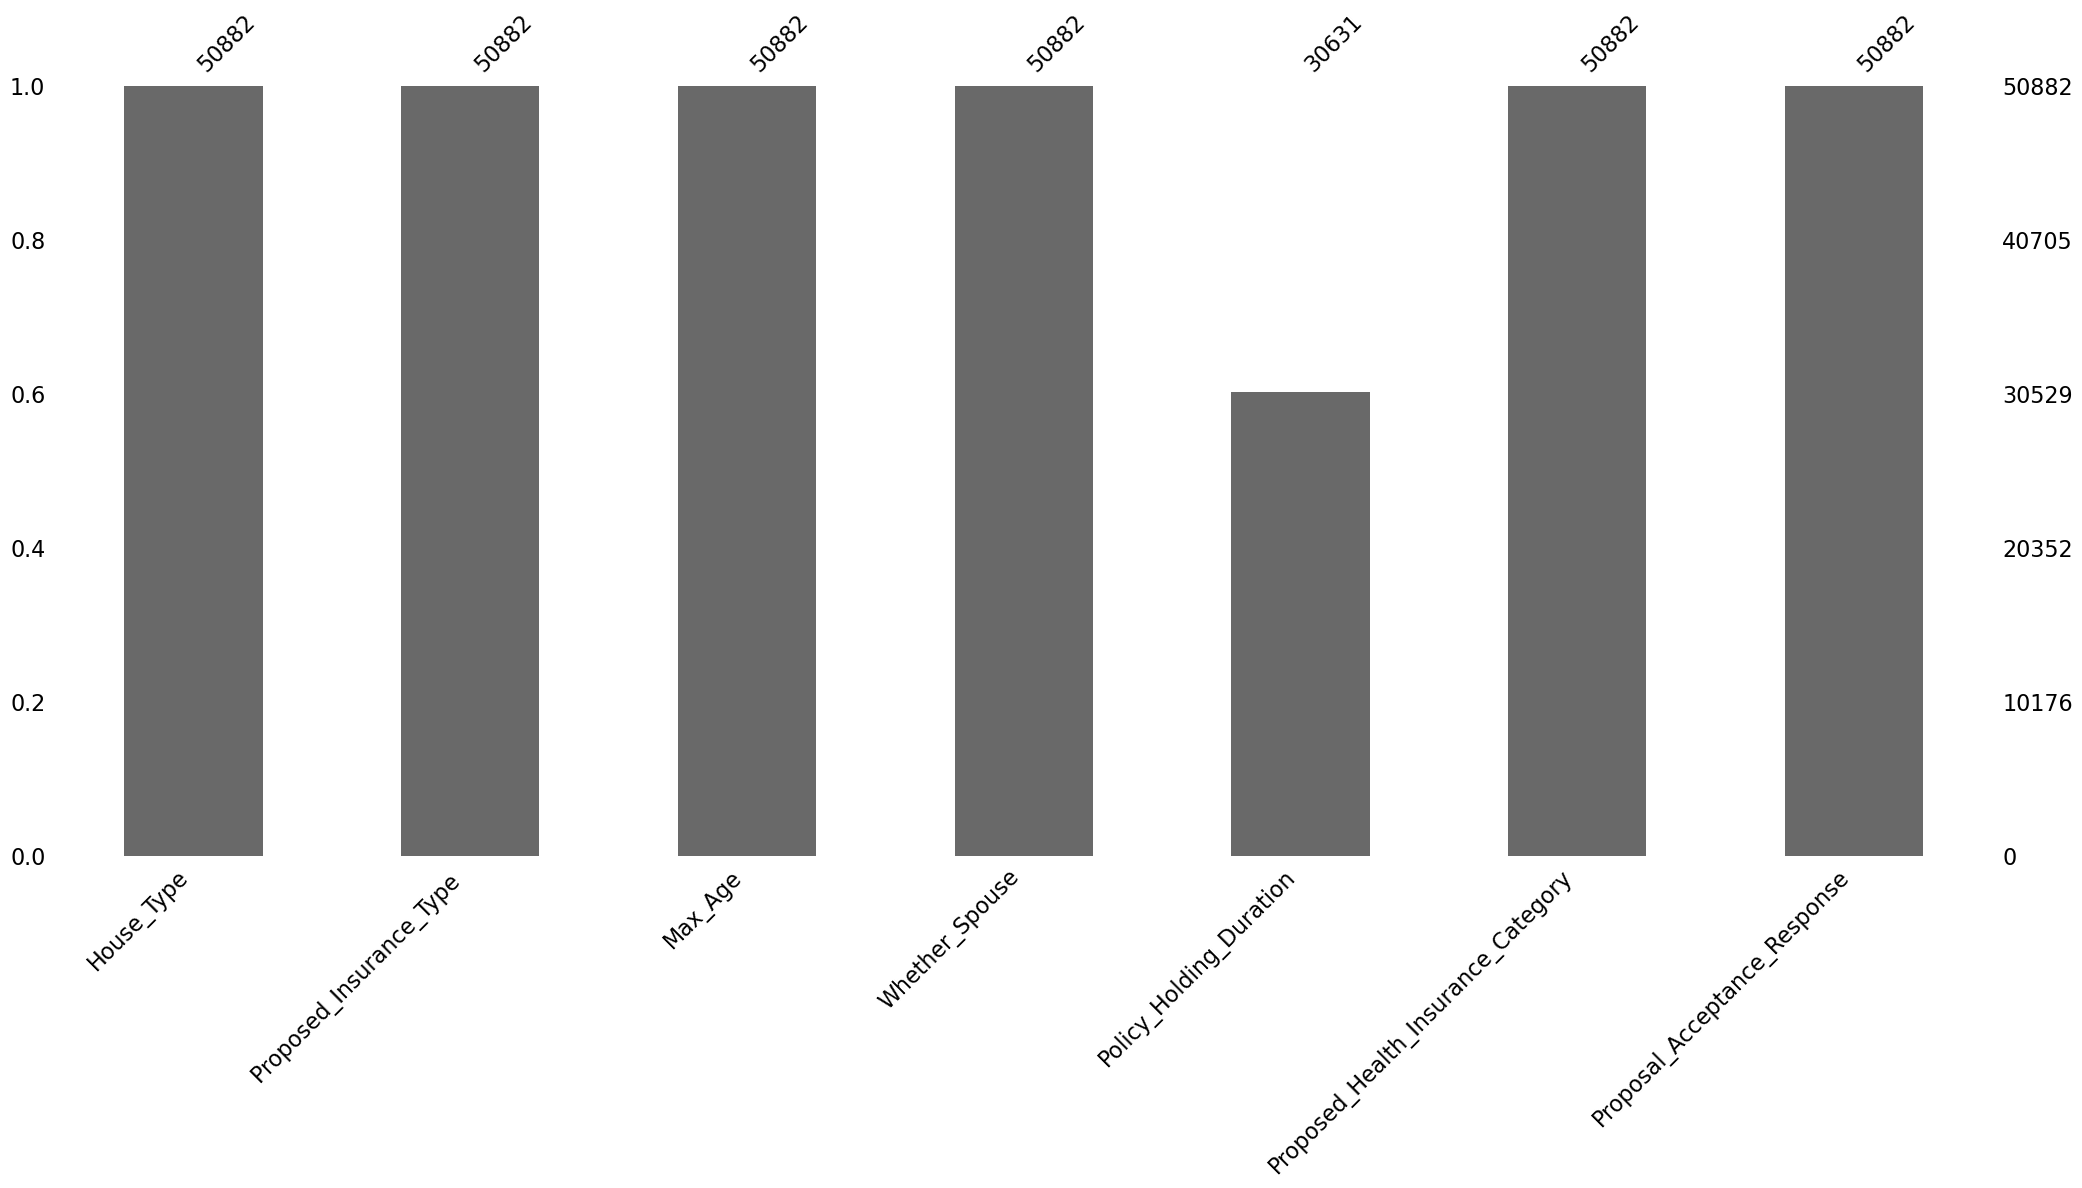

In [209]:
msno.bar(train)

In [210]:
X = train.drop(["Proposal_Acceptance_Response"],axis = 1)
y = train["Proposal_Acceptance_Response"]

In [211]:
X

,House_Type,Proposed_Insurance_Type,Max_Age,Whether_Spouse,Policy_Holding_Duration,Proposed_Health_Insurance_Category
0,Rented,Individual,36,No,14.0,22
1,Owned,Joint,75,No,NaN,22
2,Owned,Individual,32,No,1.0,19
3,Owned,Joint,52,No,14.0,19
4,Rented,Individual,44,No,3.0,16
...,...,...,...,...,...,...
50877,Rented,Individual,22,No,NaN,18
50878,Rented,Individual,27,No,7.0,4
50879,Rented,Individual,63,No,14.0,12
50880,Owned,Joint,71,No,2.0,16


In [212]:
pd.DataFrame(y)

,Proposal_Acceptance_Response
0,0
1,0
2,1
3,0
4,0
...,...
50877,0
50878,0
50879,0
50880,1


In [213]:
# detecting ouliers for all before removing 
Q1 = train[num_cols].quantile(0.25)
Q3 = train[num_cols].quantile(0.75)
IQR = Q3-Q1

before_rvm_outliers = ((train[num_cols]<(Q1-1.5*IQR)) | (train[num_cols]>(Q3+1.5*IQR))).sum()
before_rvm_outliers

Max_Age                               0
Policy_Holding_Duration               0
Proposed_Health_Insurance_Category    0
dtype: int64

In [214]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [215]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, stratify = y,test_size=0.3,random_state=107)

In [216]:
print("X_train is :   ", X_train.shape)
print("X_val is   :   ", X_val.shape)
print("y_train is :   ", y_train.shape)
print("y_val is   :   ", y_val.shape)

X_train is :    (35617, 6)
X_val is   :    (15265, 6)
y_train is :    (35617,)
y_val is   :    (15265,)


In [217]:
X_train

,House_Type,Proposed_Insurance_Type,Max_Age,Whether_Spouse,Policy_Holding_Duration,Proposed_Health_Insurance_Category
35053,Rented,Individual,20,No,NaN,15
48575,Owned,Individual,61,No,14.0,22
27173,Owned,Individual,26,No,2.0,17
15143,Rented,Individual,26,No,NaN,22
1886,Rented,Individual,49,No,1.0,1
...,...,...,...,...,...,...
19197,Rented,Individual,22,No,NaN,20
44941,Owned,Individual,61,No,7.0,20
1429,Owned,Joint,59,Yes,7.0,4
33061,Owned,Joint,45,No,8.0,13


In [218]:
pd.DataFrame(y_train)

,Proposal_Acceptance_Response
35053,0
48575,0
27173,0
15143,0
1886,0
...,...
19197,0
44941,0
1429,0
33061,0


In [219]:
X_val

,House_Type,Proposed_Insurance_Type,Max_Age,Whether_Spouse,Policy_Holding_Duration,Proposed_Health_Insurance_Category
12621,Owned,Individual,28,No,NaN,22
43308,Owned,Individual,27,No,5.0,16
13109,Rented,Individual,42,No,NaN,21
16917,Rented,Joint,34,Yes,NaN,17
23706,Rented,Individual,69,No,NaN,21
...,...,...,...,...,...,...
18089,Owned,Individual,29,No,7.0,1
9541,Rented,Individual,19,No,NaN,16
11536,Owned,Joint,69,Yes,5.0,7
39721,Rented,Individual,27,No,NaN,21


In [220]:
pd.DataFrame(y_val)

,Proposal_Acceptance_Response
12621,1
43308,0
13109,1
16917,0
23706,0
...,...
18089,0
9541,1
11536,0
39721,0


In [221]:
y_train.value_counts(normalize = True)*100

0    76.00584
1    23.99416
Name: Proposal_Acceptance_Response, dtype: float64

In [222]:
y_val.value_counts(normalize = True)*100

0    76.003931
1    23.996069
Name: Proposal_Acceptance_Response, dtype: float64

In [223]:
X_train.isnull().sum()

House_Type                                0
Proposed_Insurance_Type                   0
Max_Age                                   0
Whether_Spouse                            0
Policy_Holding_Duration               14111
Proposed_Health_Insurance_Category        0
dtype: int64

In [224]:
X_val.isnull().sum()

House_Type                               0
Proposed_Insurance_Type                  0
Max_Age                                  0
Whether_Spouse                           0
Policy_Holding_Duration               6140
Proposed_Health_Insurance_Category       0
dtype: int64

In [225]:
from sklearn.impute import SimpleImputer

In [226]:
imputer = SimpleImputer(strategy= "mean")
imputer = imputer.fit(X_train[num_cols])

In [227]:
X_train_imputed = pd.DataFrame(imputer.transform(X_train[num_cols]), columns = X_train[num_cols].columns)
X_val_imputed = pd.DataFrame(imputer.transform(X_val[num_cols]), columns = X_val[num_cols].columns)

In [228]:
X_train_imputed.isnull().sum()

Max_Age                               0
Policy_Holding_Duration               0
Proposed_Health_Insurance_Category    0
dtype: int64

In [229]:
X_val_imputed.isnull().sum()

Max_Age                               0
Policy_Holding_Duration               0
Proposed_Health_Insurance_Category    0
dtype: int64

In [230]:
from sklearn.preprocessing import StandardScaler

In [231]:
# fitting the X_train[num_cols] in standardization model
scaler = StandardScaler()
scaler = scaler.fit(X_train_imputed)

In [232]:
# fitting the X_train[num_cols] and X_test[num_cols] in standardization model
X_train_std = pd.DataFrame(scaler.transform(X_train_imputed), columns = X_train[num_cols].columns)
X_val_std = pd.DataFrame(scaler.transform(X_val_imputed), columns = X_val[num_cols].columns)

In [233]:
X_train_std

,Max_Age,Policy_Holding_Duration,Proposed_Health_Insurance_Category
0,-1.435572,-2.547117e-16,-0.017867
1,0.932393,2.294159e+00,1.084234
2,-1.089040,-1.147199e+00,0.297019
3,-1.089040,-2.547117e-16,1.084234
4,0.239330,-1.433979e+00,-2.222069
...,...,...,...
35612,-1.320061,-2.547117e-16,0.769348
35613,0.932393,2.866998e-01,0.769348
35614,0.816882,2.866998e-01,-1.749740
35615,0.008309,5.734797e-01,-0.332753


In [234]:
X_val_std

,Max_Age,Policy_Holding_Duration,Proposed_Health_Insurance_Category
0,-0.973530,-2.547117e-16,1.084234
1,-1.031285,-2.868598e-01,0.139576
2,-0.164957,-2.547117e-16,0.926791
3,-0.626999,-2.547117e-16,0.297019
4,1.394434,-2.547117e-16,0.926791
...,...,...,...
15260,-0.915775,2.866998e-01,-2.222069
15261,-1.493327,-2.547117e-16,0.139576
15262,1.394434,-2.868598e-01,-1.277411
15263,-1.031285,-2.547117e-16,0.926791


In [235]:
# creationg dummies for cat_cols from X_train
X_train_dummies = pd.get_dummies(X_train[cat_cols],drop_first = True)

In [236]:
X_train_dummies

,Proposed_Insurance_Type _Joint,House_Type_Rented,Whether_Spouse_Yes
35053,0,1,0
48575,0,0,0
27173,0,0,0
15143,0,1,0
1886,0,1,0
...,...,...,...
19197,0,1,0
44941,0,0,0
1429,1,0,1
33061,1,0,0


In [237]:
# creationg dummies for cat_cols from X_test
X_val_dummies = pd.get_dummies(X_val[cat_cols],drop_first = True)

In [238]:
X_val_dummies

,Proposed_Insurance_Type _Joint,House_Type_Rented,Whether_Spouse_Yes
12621,0,0,0
43308,0,0,0
13109,0,1,0
16917,1,1,1
23706,0,1,0
...,...,...,...
18089,0,0,0
9541,0,1,0
11536,1,0,1
39721,0,1,0


In [239]:
# resetting the index to concat correctly
X_train_std = X_train_std.reset_index()
X_train_std

,index,Max_Age,Policy_Holding_Duration,Proposed_Health_Insurance_Category
0,0,-1.435572,-2.547117e-16,-0.017867
1,1,0.932393,2.294159e+00,1.084234
2,2,-1.089040,-1.147199e+00,0.297019
3,3,-1.089040,-2.547117e-16,1.084234
4,4,0.239330,-1.433979e+00,-2.222069
...,...,...,...,...
35612,35612,-1.320061,-2.547117e-16,0.769348
35613,35613,0.932393,2.866998e-01,0.769348
35614,35614,0.816882,2.866998e-01,-1.749740
35615,35615,0.008309,5.734797e-01,-0.332753


In [240]:
# dropping the index column 
X_train_std = X_train_std.drop(["index"], axis = 1)
X_train_std

,Max_Age,Policy_Holding_Duration,Proposed_Health_Insurance_Category
0,-1.435572,-2.547117e-16,-0.017867
1,0.932393,2.294159e+00,1.084234
2,-1.089040,-1.147199e+00,0.297019
3,-1.089040,-2.547117e-16,1.084234
4,0.239330,-1.433979e+00,-2.222069
...,...,...,...
35612,-1.320061,-2.547117e-16,0.769348
35613,0.932393,2.866998e-01,0.769348
35614,0.816882,2.866998e-01,-1.749740
35615,0.008309,5.734797e-01,-0.332753


In [241]:
# resetting the index to concat correctly
X_val_std = X_val_std.reset_index()
X_val_std

,index,Max_Age,Policy_Holding_Duration,Proposed_Health_Insurance_Category
0,0,-0.973530,-2.547117e-16,1.084234
1,1,-1.031285,-2.868598e-01,0.139576
2,2,-0.164957,-2.547117e-16,0.926791
3,3,-0.626999,-2.547117e-16,0.297019
4,4,1.394434,-2.547117e-16,0.926791
...,...,...,...,...
15260,15260,-0.915775,2.866998e-01,-2.222069
15261,15261,-1.493327,-2.547117e-16,0.139576
15262,15262,1.394434,-2.868598e-01,-1.277411
15263,15263,-1.031285,-2.547117e-16,0.926791


In [242]:
# dropping the index column 
X_val_std = X_val_std.drop(["index"], axis = 1)
X_val_std

,Max_Age,Policy_Holding_Duration,Proposed_Health_Insurance_Category
0,-0.973530,-2.547117e-16,1.084234
1,-1.031285,-2.868598e-01,0.139576
2,-0.164957,-2.547117e-16,0.926791
3,-0.626999,-2.547117e-16,0.297019
4,1.394434,-2.547117e-16,0.926791
...,...,...,...
15260,-0.915775,2.866998e-01,-2.222069
15261,-1.493327,-2.547117e-16,0.139576
15262,1.394434,-2.868598e-01,-1.277411
15263,-1.031285,-2.547117e-16,0.926791


In [243]:
# resetting the index to concat correctly
X_train_dummies = X_train_dummies.reset_index()
X_train_dummies

,index,Proposed_Insurance_Type _Joint,House_Type_Rented,Whether_Spouse_Yes
0,35053,0,1,0
1,48575,0,0,0
2,27173,0,0,0
3,15143,0,1,0
4,1886,0,1,0
...,...,...,...,...
35612,19197,0,1,0
35613,44941,0,0,0
35614,1429,1,0,1
35615,33061,1,0,0


In [244]:
# dropping the index column 
X_train_dummies = X_train_dummies.drop(["index"], axis = 1)
X_train_dummies

,Proposed_Insurance_Type _Joint,House_Type_Rented,Whether_Spouse_Yes
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,1,0
...,...,...,...
35612,0,1,0
35613,0,0,0
35614,1,0,1
35615,1,0,0


In [245]:
# resetting the index to concat correctly
X_val_dummies = X_val_dummies.reset_index()
X_val_dummies

,index,Proposed_Insurance_Type _Joint,House_Type_Rented,Whether_Spouse_Yes
0,12621,0,0,0
1,43308,0,0,0
2,13109,0,1,0
3,16917,1,1,1
4,23706,0,1,0
...,...,...,...,...
15260,18089,0,0,0
15261,9541,0,1,0
15262,11536,1,0,1
15263,39721,0,1,0


In [246]:
# dropping the index column 
X_val_dummies = X_val_dummies.drop(["index"], axis = 1)
X_val_dummies

,Proposed_Insurance_Type _Joint,House_Type_Rented,Whether_Spouse_Yes
0,0,0,0
1,0,0,0
2,0,1,0
3,1,1,1
4,0,1,0
...,...,...,...
15260,0,0,0
15261,0,1,0
15262,1,0,1
15263,0,1,0


In [247]:
# Concating the X_train_std, X_train_dummies as final_X_train_data
final_X_train = pd.concat([X_train_std,X_train_dummies], axis = 1)

In [248]:
final_X_train

,Max_Age,Policy_Holding_Duration,Proposed_Health_Insurance_Category,Proposed_Insurance_Type _Joint,House_Type_Rented,Whether_Spouse_Yes
0,-1.435572,-2.547117e-16,-0.017867,0,1,0
1,0.932393,2.294159e+00,1.084234,0,0,0
2,-1.089040,-1.147199e+00,0.297019,0,0,0
3,-1.089040,-2.547117e-16,1.084234,0,1,0
4,0.239330,-1.433979e+00,-2.222069,0,1,0
...,...,...,...,...,...,...
35612,-1.320061,-2.547117e-16,0.769348,0,1,0
35613,0.932393,2.866998e-01,0.769348,0,0,0
35614,0.816882,2.866998e-01,-1.749740,1,0,1
35615,0.008309,5.734797e-01,-0.332753,1,0,0


In [249]:
# Concating the X_test_std, X_test_dummies as final_X_test_data
final_X_val = pd.concat([X_val_std,X_val_dummies], axis = 1)

In [250]:
final_X_val

,Max_Age,Policy_Holding_Duration,Proposed_Health_Insurance_Category,Proposed_Insurance_Type _Joint,House_Type_Rented,Whether_Spouse_Yes
0,-0.973530,-2.547117e-16,1.084234,0,0,0
1,-1.031285,-2.868598e-01,0.139576,0,0,0
2,-0.164957,-2.547117e-16,0.926791,0,1,0
3,-0.626999,-2.547117e-16,0.297019,1,1,1
4,1.394434,-2.547117e-16,0.926791,0,1,0
...,...,...,...,...,...,...
15260,-0.915775,2.866998e-01,-2.222069,0,0,0
15261,-1.493327,-2.547117e-16,0.139576,0,1,0
15262,1.394434,-2.868598e-01,-1.277411,1,0,1
15263,-1.031285,-2.547117e-16,0.926791,0,1,0


# Model Building

## Logistic Regression

In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [252]:
log_reg = LogisticRegression(random_state = 10)

In [253]:
# Define the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

In [254]:
# Define the GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=5)

In [255]:
# Fit GridSearchCV object to data
grid_search.fit(final_X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=10),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [256]:
# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [257]:
log_reg = LogisticRegression(C = 0.01, penalty = "l1", solver = "liblinear")
log_reg = log_reg.fit(final_X_train,y_train)

In [258]:
# predicting the y value for the train data
log_reg_y_train_preds = log_reg.predict(final_X_train)
log_reg_y_train_preds[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [259]:
# predicting the y value for the test data
log_reg_y_val_preds = log_reg.predict(final_X_val)
log_reg_y_val_preds[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [260]:
# import libraries of confusion_matrix and accuracy and recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score, f1_score, recall_score

In [261]:
# finding the confusion_matrix for y_train actuals and y_train_predicts
confusionmatrix = confusion_matrix(y_train,log_reg_y_train_preds)
confusionmatrix

array([[27071,     0],
       [ 8546,     0]])

In [262]:
# finding the confusion_matrix for y_test actuals and y_test_predicts
confusionmatrix = confusion_matrix(y_val,log_reg_y_val_preds)
confusionmatrix

array([[11602,     0],
       [ 3663,     0]])

In [263]:
# finding the accuracy for y_train_actuals and y_train_predicts
log_reg_accuracy_train = accuracy_score(y_train,log_reg_y_train_preds)
log_reg_accuracy_train

0.7600583990790915

In [264]:
# finding the accuracy for y_test_actuals and y_test_predicts
log_reg_accuracy_val = accuracy_score(y_val,log_reg_y_val_preds)
log_reg_accuracy_val

0.7600393056010482

In [265]:
log_reg_f1_score_train = f1_score(y_train,log_reg_y_train_preds,average='micro')
log_reg_f1_score_train

0.7600583990790915

In [266]:
log_reg_f1_score_val = f1_score(y_val,log_reg_y_val_preds,average='micro')
log_reg_f1_score_val

0.7600393056010482

In [267]:
log_reg_recall_train = recall_score(y_train,log_reg_y_train_preds, average = "micro")
log_reg_recall_train

0.7600583990790915

In [268]:
log_reg_recall_val = recall_score(y_val,log_reg_y_val_preds, average = "micro")
log_reg_recall_val

0.7600393056010482

## SVM

In [269]:
from sklearn.svm import SVC

In [270]:
'''param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [0.1, 1, 10, 100], 
              'kernel': ['linear', 'rbf']}'''

"param_grid = {'C': [0.1, 1, 10, 100], \n              'gamma': [0.1, 1, 10, 100], \n              'kernel': ['linear', 'rbf']}"

In [271]:
'''# Create the SVM model
svm_model = SVC(random_state = 10)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=2)

# Fit the GridSearchCV object to the data
grid_search.fit(final_X_train, y_train)'''

'# Create the SVM model\nsvm_model = SVC(random_state = 10)\n\n# Create the GridSearchCV object\ngrid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=2)\n\n# Fit the GridSearchCV object to the data\ngrid_search.fit(final_X_train, y_train)'

In [272]:
# model building by SVM algorithm
svm_model = SVC(kernel="rbf", C = 1, gamma = 0.1)
svm_model = svm_model.fit(final_X_train,y_train)

In [273]:
# predicting the y value for the train data
svm_model_y_train_preds = svm_model.predict(final_X_train)
svm_model_y_train_preds[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [274]:
# predicting the y value for the test data
svm_model_y_val_preds = svm_model.predict(final_X_val)
svm_model_y_val_preds[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [275]:
# finding the confusion_matrix for y_train actuals and y_train_predicts
confusionmatrix = confusion_matrix(y_train,svm_model_y_train_preds)
confusionmatrix

array([[27071,     0],
       [ 8546,     0]])

In [276]:
# finding the confusion_matrix for y_test actuals and y_test_predicts
confusionmatrix = confusion_matrix(y_val,svm_model_y_val_preds)
confusionmatrix

array([[11602,     0],
       [ 3663,     0]])

In [277]:
# finding the accuracy for y_train_actuals and y_train_predicts
svm_accuracy_train = accuracy_score(y_train,svm_model_y_train_preds)
svm_accuracy_train

0.7600583990790915

In [278]:
# finding the accuracy for y_test_actuals and y_test_predicts
svm_accuracy_test = accuracy_score(y_val,svm_model_y_val_preds)
svm_accuracy_test

0.7600393056010482

In [279]:
svm_f1_score_train = f1_score(y_train,svm_model_y_train_preds,average='micro')
svm_f1_score_train

0.7600583990790915

In [280]:
svm_f1_score_test = f1_score(y_val,svm_model_y_val_preds,average='micro')
svm_f1_score_test

0.7600393056010482

In [281]:
svm_recall_train = recall_score(y_train,svm_model_y_train_preds,average='micro')
svm_recall_train

0.7600583990790915

In [282]:
svm_recall_val = recall_score(y_val,svm_model_y_val_preds,average='micro')
svm_recall_val

0.7600393056010482

In [283]:
from sklearn.neighbors import KNeighborsClassifier

In [284]:
# define the KNN model
knn = KNeighborsClassifier()

In [285]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [286]:
'''#Use GridSearch
clf = GridSearchCV(knn, hyperparameters, cv=2)
#Fit the model
best_model = clf.fit(final_X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])'''

"#Use GridSearch\nclf = GridSearchCV(knn, hyperparameters, cv=2)\n#Fit the model\nbest_model = clf.fit(final_X_train, y_train)\n#Print The value of best Hyperparameters\nprint('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])\nprint('Best p:', best_model.best_estimator_.get_params()['p'])\nprint('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])"

In [287]:
'''# perform the GridSearchCV
clf.fit(final_X_train, y_train)'''

'# perform the GridSearchCV\nclf.fit(final_X_train, y_train)'

In [288]:
'''# get the best set of hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")'''

'# get the best set of hyperparameters and the corresponding score\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\nprint(f"Best parameters: {best_params}")\nprint(f"Best score: {best_score}")'

In [289]:
test = pd.read_csv("test.csv")
test

,Proposal_ID,Town_Code,Location_Code,House_Type,Proposed_Insurance_Type,Max_Age,Min_Age,Whether_Spouse,Health_Benchmark,Policy_Holding_Duration,Policy_Holding_Type,Proposed_Health_Insurance_Category,Proposed_Health_Insurance_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3,1.0,19,11568.0


In [290]:
test.shape

(21805, 13)

In [291]:
# replacing the 14+ value to 14 in Policy_Holding_Duration column
test["Policy_Holding_Duration"] = test["Policy_Holding_Duration"].replace('14+', 14)        
test["Policy_Holding_Duration"].value_counts()

14    1892
1     1891
2     1772
3     1606
4     1205
5      992
6      903
7      664
8      569
9      493
10     333
11     254
13     221
14     211
12     196
Name: Policy_Holding_Duration, dtype: int64

In [292]:
test.dtypes

Proposal_ID                             int64
Town_Code                              object
Location_Code                           int64
House_Type                             object
Proposed_Insurance_Type                object
Max_Age                                 int64
Min_Age                                 int64
Whether_Spouse                         object
Health_Benchmark                       object
Policy_Holding_Duration                object
Policy_Holding_Type                   float64
Proposed_Health_Insurance_Category      int64
Proposed_Health_Insurance_Premium     float64
dtype: object

In [293]:
test.columns

Index(['Proposal_ID', 'Town_Code', 'Location_Code', 'House_Type',
       'Proposed_Insurance_Type ', 'Max_Age', 'Min_Age', 'Whether_Spouse',
       'Health_Benchmark', 'Policy_Holding_Duration', 'Policy_Holding_Type',
       'Proposed_Health_Insurance_Category',
       'Proposed_Health_Insurance_Premium'],
      dtype='object')

In [294]:
cols=['Proposal_ID', 'Town_Code', 'Location_Code', 'House_Type',
       'Proposed_Insurance_Type ','Whether_Spouse',
       'Health_Benchmark', 'Policy_Holding_Type']

In [295]:
test[cols]=test[cols].astype('category')

In [296]:
test.dtypes

Proposal_ID                           category
Town_Code                             category
Location_Code                         category
House_Type                            category
Proposed_Insurance_Type               category
Max_Age                                  int64
Min_Age                                  int64
Whether_Spouse                        category
Health_Benchmark                      category
Policy_Holding_Duration                 object
Policy_Holding_Type                   category
Proposed_Health_Insurance_Category       int64
Proposed_Health_Insurance_Premium      float64
dtype: object

In [297]:
# converting Policy_Holding_Duration object data type into float
test["Policy_Holding_Duration"] = test["Policy_Holding_Duration"].astype('float')

In [298]:
test.dtypes

Proposal_ID                           category
Town_Code                             category
Location_Code                         category
House_Type                            category
Proposed_Insurance_Type               category
Max_Age                                  int64
Min_Age                                  int64
Whether_Spouse                        category
Health_Benchmark                      category
Policy_Holding_Duration                float64
Policy_Holding_Type                   category
Proposed_Health_Insurance_Category       int64
Proposed_Health_Insurance_Premium      float64
dtype: object

In [299]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Max_Age,21805.0,44.877734,17.254898,18.0,28.0,44.0,59.0,75.0
Min_Age,21805.0,42.748085,17.269112,16.0,27.0,41.0,57.0,75.0
Policy_Holding_Duration,13202.0,6.050523,4.500598,1.0,2.0,5.0,9.0,14.0
Proposed_Health_Insurance_Category,21805.0,15.138363,6.302805,1.0,12.0,17.0,20.0,22.0
Proposed_Health_Insurance_Premium,21805.0,14220.306581,6497.996164,2152.0,9285.0,13244.0,18201.6,43776.0


In [300]:
test.duplicated().sum()

0

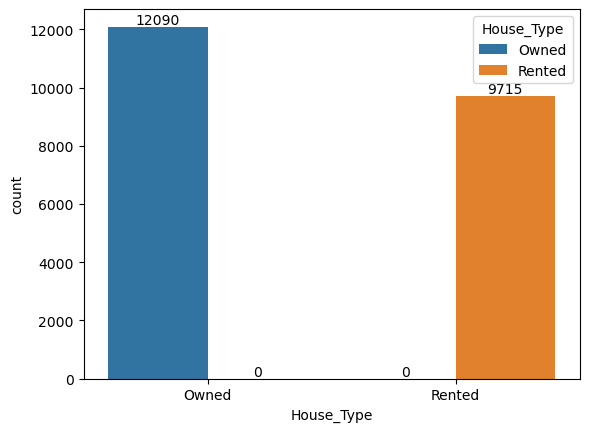

In [301]:
# create count plot
ax = sns.countplot(x="House_Type", hue = "House_Type", data=test)

# add numbers on top of bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# display plot
plt.show()

In [302]:
test["Policy_Holding_Type"].value_counts()

3.0    5572
1.0    3574
2.0    2150
4.0    1906
Name: Policy_Holding_Type, dtype: int64

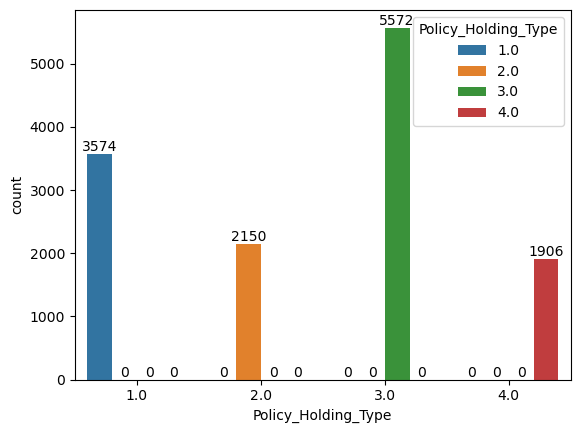

In [303]:
# create count plot
sns.countplot(x="Policy_Holding_Type", hue = "Policy_Holding_Type", data=test)

# add numbers on top of bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# display plot
plt.show()

<AxesSubplot:>

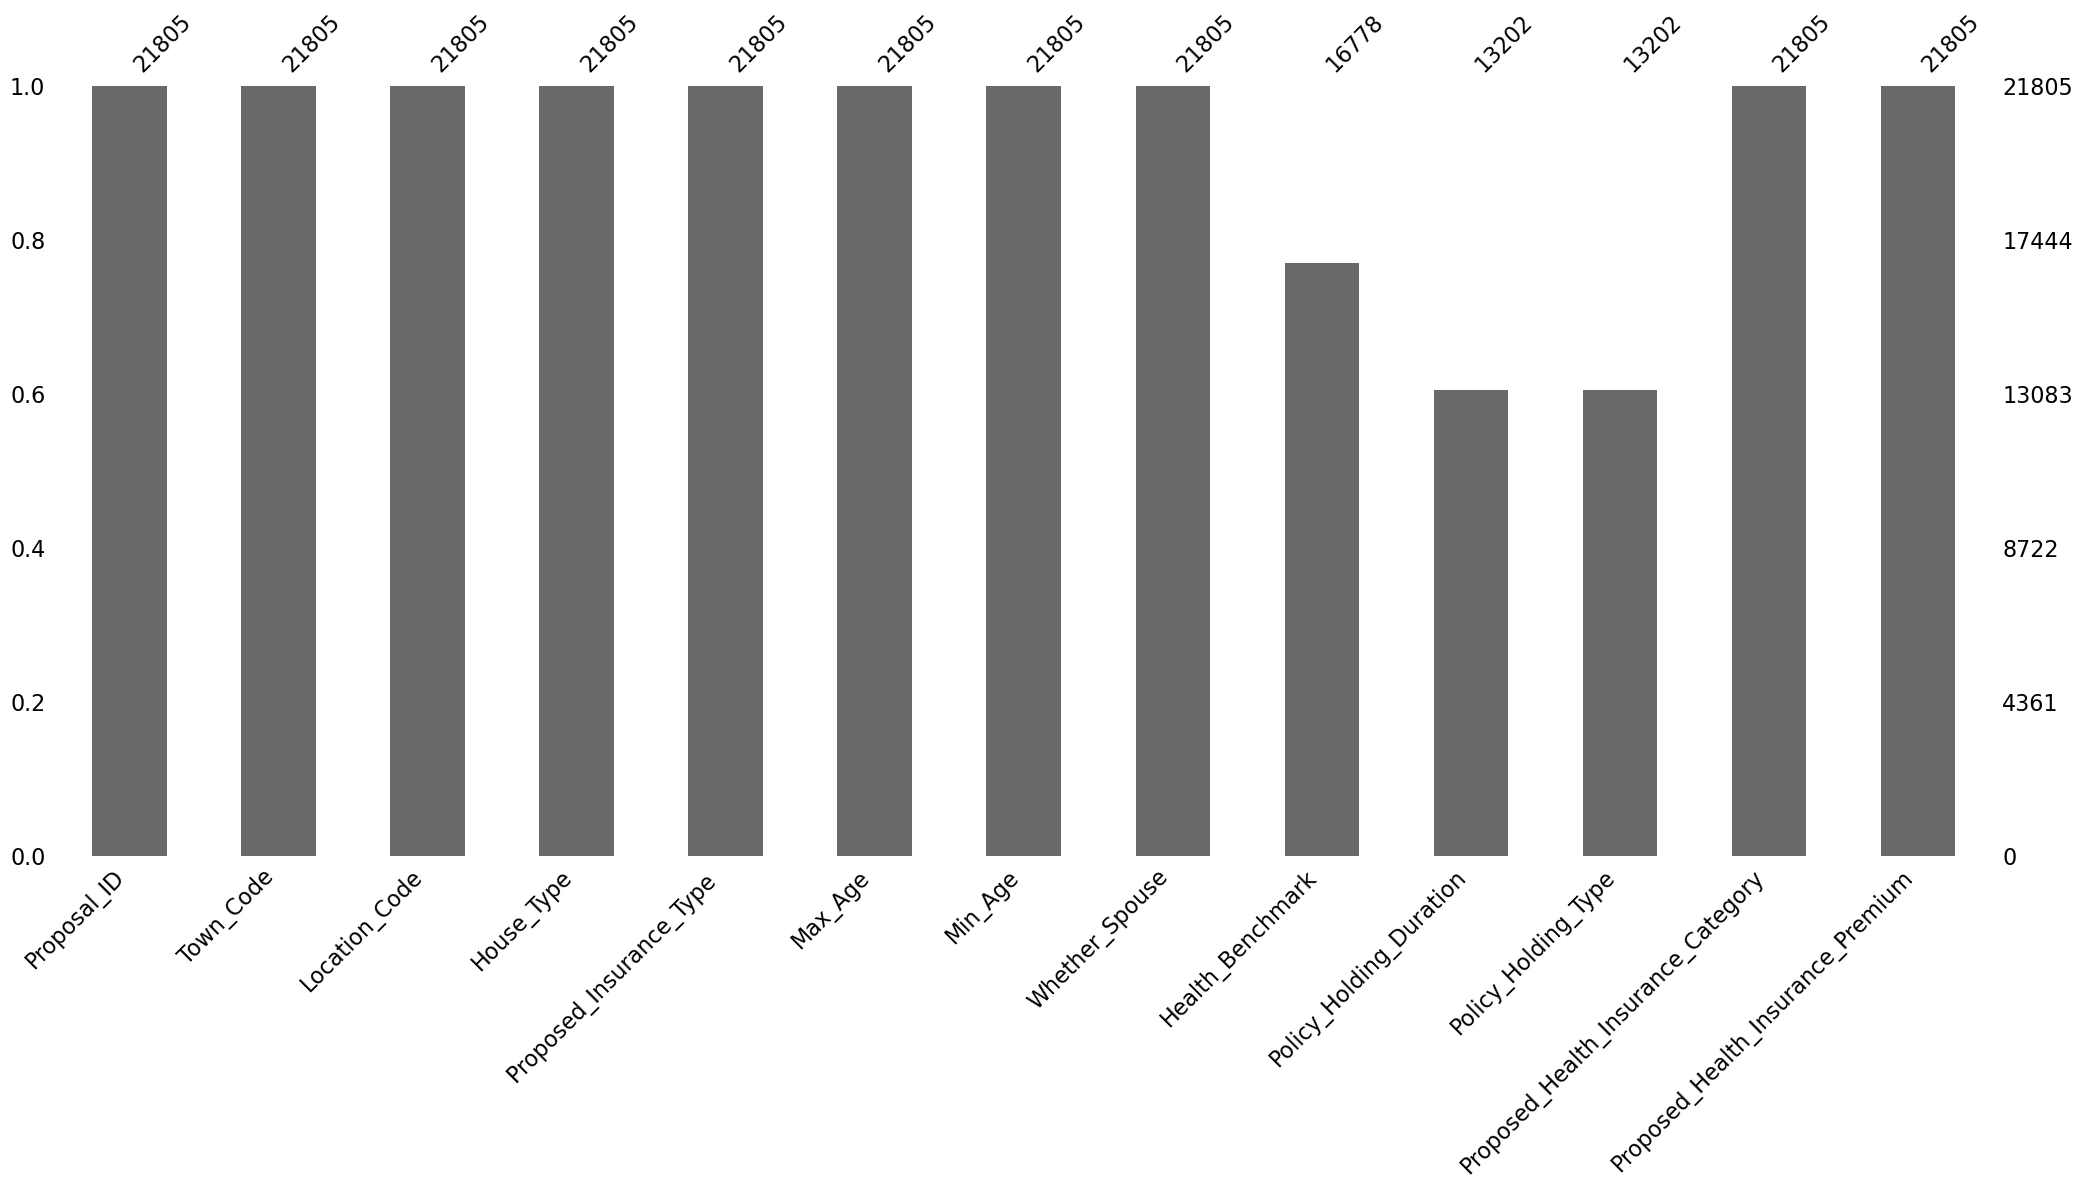

In [304]:
msno.bar(test)

In [305]:
nulls = test.isnull().sum()*100/len(test)
nulls = nulls.round(2)
nulls

Proposal_ID                            0.00
Town_Code                              0.00
Location_Code                          0.00
House_Type                             0.00
Proposed_Insurance_Type                0.00
Max_Age                                0.00
Min_Age                                0.00
Whether_Spouse                         0.00
Health_Benchmark                      23.05
Policy_Holding_Duration               39.45
Policy_Holding_Type                   39.45
Proposed_Health_Insurance_Category     0.00
Proposed_Health_Insurance_Premium      0.00
dtype: float64

## Dropping the columns based on Insignificant Columns (p>0.05)

In [306]:
test.drop(['Proposal_ID','Town_Code', 'Location_Code', 'Health_Benchmark', 'Policy_Holding_Type', 'Proposed_Health_Insurance_Premium'],axis =1, inplace = True)
test.head()

,House_Type,Proposed_Insurance_Type,Max_Age,Min_Age,Whether_Spouse,Policy_Holding_Duration,Proposed_Health_Insurance_Category
0,Owned,Individual,30,30,No,6.0,5
1,Owned,Joint,69,68,Yes,3.0,18
2,Rented,Individual,28,28,No,2.0,17
3,Rented,Individual,23,23,No,3.0,18
4,Owned,Individual,75,75,No,NaN,5


In [307]:
test.shape

(21805, 7)

## Dropping the columns based on coorelation

In [308]:
test.drop(["Min_Age"],axis = 1, inplace = True)
test.head()

,House_Type,Proposed_Insurance_Type,Max_Age,Whether_Spouse,Policy_Holding_Duration,Proposed_Health_Insurance_Category
0,Owned,Individual,30,No,6.0,5
1,Owned,Joint,69,Yes,3.0,18
2,Rented,Individual,28,No,2.0,17
3,Rented,Individual,23,No,3.0,18
4,Owned,Individual,75,No,NaN,5


In [309]:
test.shape

(21805, 6)

<AxesSubplot:>

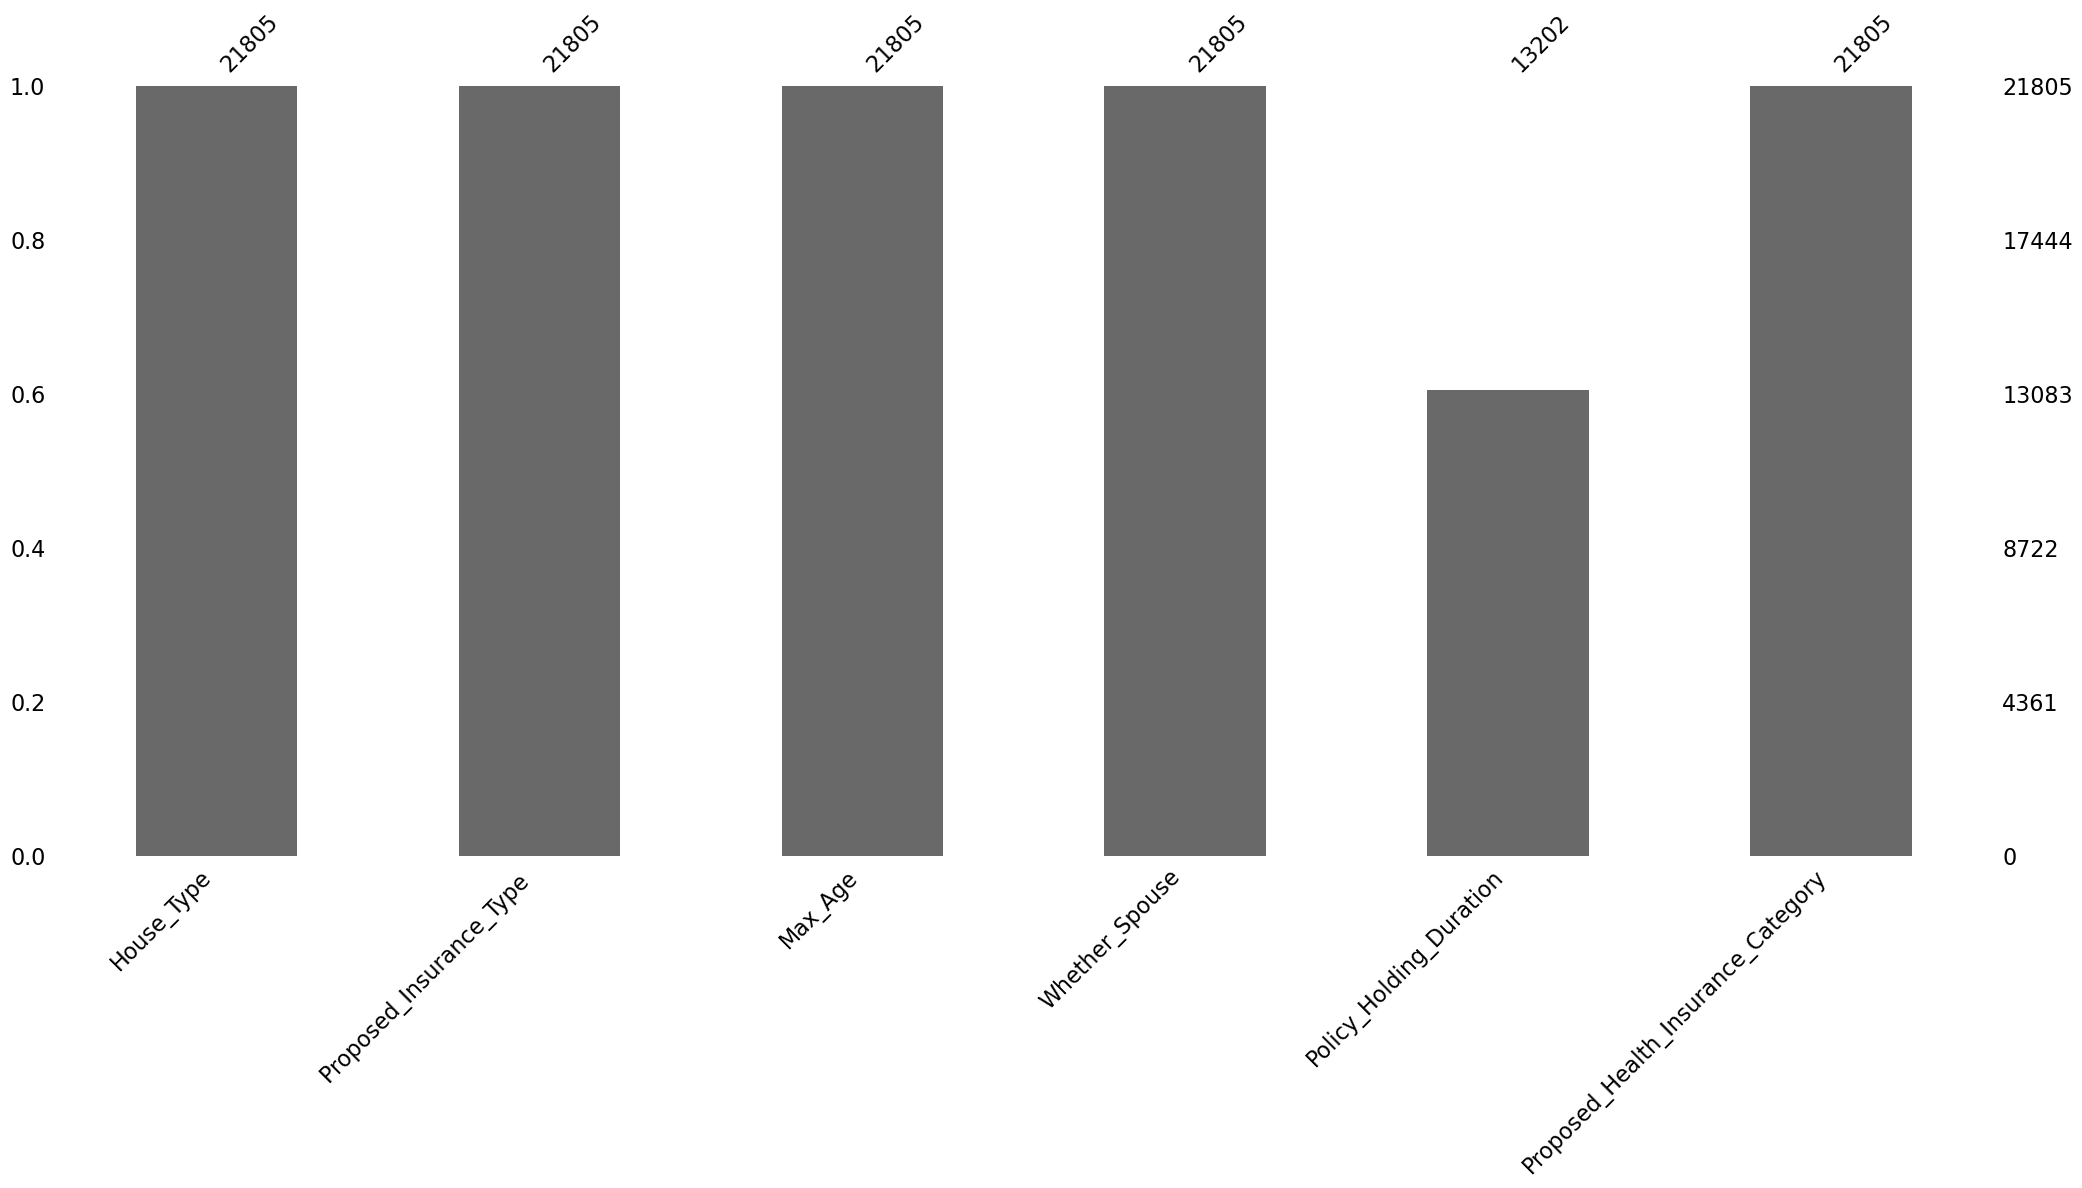

In [310]:
msno.bar(test)

In [311]:
# detecting ouliers for all before removing 
Q1 = test[num_cols].quantile(0.25)
Q3 = test[num_cols].quantile(0.75)
IQR = Q3-Q1

before_rvm_outliers = ((test[num_cols]<(Q1-1.5*IQR)) | (test[num_cols]>(Q3+1.5*IQR))).sum()
before_rvm_outliers

Max_Age                               0
Policy_Holding_Duration               0
Proposed_Health_Insurance_Category    0
dtype: int64

In [312]:
imputer = SimpleImputer(strategy= "mean")
imputer = imputer.fit(test[num_cols])

In [313]:
test_imputed = pd.DataFrame(imputer.transform(test[num_cols]), columns = test[num_cols].columns)

In [314]:
test_imputed.isnull().sum()

Max_Age                               0
Policy_Holding_Duration               0
Proposed_Health_Insurance_Category    0
dtype: int64

In [315]:
# fitting the X_train[num_cols] in standardization model
scaler = StandardScaler()
scaler = scaler.fit(test_imputed)

In [316]:
# fitting the test[num_cols] in standardization model
test_std = pd.DataFrame(scaler.transform(test_imputed), columns = test[num_cols].columns)

In [317]:
test_std

,Max_Age,Policy_Holding_Duration,Proposed_Health_Insurance_Category
0,-0.862252,-1.442748e-02,-1.608585
1,1.398027,-8.711214e-01,0.454036
2,-0.978164,-1.156686e+00,0.295373
3,-1.267943,-8.711214e-01,0.454036
4,1.745763,2.536323e-16,-1.608585
...,...,...,...
21800,0.007086,-5.855567e-01,0.454036
21801,0.818468,-1.442748e-02,0.454036
21802,1.687807,2.536323e-16,-2.243237
21803,-1.152032,-8.711214e-01,0.612700


In [318]:
# creationg dummies for cat_cols from test
test_dummies = pd.get_dummies(test[cat_cols],drop_first = True)

In [319]:
test_dummies

,Proposed_Insurance_Type _Joint,House_Type_Rented,Whether_Spouse_Yes
0,0,0,0
1,1,0,1
2,0,1,0
3,0,1,0
4,0,0,0
...,...,...,...
21800,0,0,0
21801,0,0,0
21802,0,0,0
21803,0,1,0


In [320]:
# resetting the index to concat correctly
test_std = test_std.reset_index()
test_std

,index,Max_Age,Policy_Holding_Duration,Proposed_Health_Insurance_Category
0,0,-0.862252,-1.442748e-02,-1.608585
1,1,1.398027,-8.711214e-01,0.454036
2,2,-0.978164,-1.156686e+00,0.295373
3,3,-1.267943,-8.711214e-01,0.454036
4,4,1.745763,2.536323e-16,-1.608585
...,...,...,...,...
21800,21800,0.007086,-5.855567e-01,0.454036
21801,21801,0.818468,-1.442748e-02,0.454036
21802,21802,1.687807,2.536323e-16,-2.243237
21803,21803,-1.152032,-8.711214e-01,0.612700


In [321]:
# dropping the index column 
test_std = test_std.drop(["index"], axis = 1)
test_std

,Max_Age,Policy_Holding_Duration,Proposed_Health_Insurance_Category
0,-0.862252,-1.442748e-02,-1.608585
1,1.398027,-8.711214e-01,0.454036
2,-0.978164,-1.156686e+00,0.295373
3,-1.267943,-8.711214e-01,0.454036
4,1.745763,2.536323e-16,-1.608585
...,...,...,...
21800,0.007086,-5.855567e-01,0.454036
21801,0.818468,-1.442748e-02,0.454036
21802,1.687807,2.536323e-16,-2.243237
21803,-1.152032,-8.711214e-01,0.612700


In [322]:
# resetting the index to concat correctly
test_dummies = test_dummies.reset_index()
test_dummies

,index,Proposed_Insurance_Type _Joint,House_Type_Rented,Whether_Spouse_Yes
0,0,0,0,0
1,1,1,0,1
2,2,0,1,0
3,3,0,1,0
4,4,0,0,0
...,...,...,...,...
21800,21800,0,0,0
21801,21801,0,0,0
21802,21802,0,0,0
21803,21803,0,1,0


In [323]:
# dropping the index column 
test_dummies = test_dummies.drop(["index"], axis = 1)
test_dummies

,Proposed_Insurance_Type _Joint,House_Type_Rented,Whether_Spouse_Yes
0,0,0,0
1,1,0,1
2,0,1,0
3,0,1,0
4,0,0,0
...,...,...,...
21800,0,0,0
21801,0,0,0
21802,0,0,0
21803,0,1,0


In [324]:
# Concating the test_std, tes_dummies as final_test
final_test = pd.concat([test_std,test_dummies], axis = 1)
final_test

,Max_Age,Policy_Holding_Duration,Proposed_Health_Insurance_Category,Proposed_Insurance_Type _Joint,House_Type_Rented,Whether_Spouse_Yes
0,-0.862252,-1.442748e-02,-1.608585,0,0,0
1,1.398027,-8.711214e-01,0.454036,1,0,1
2,-0.978164,-1.156686e+00,0.295373,0,1,0
3,-1.267943,-8.711214e-01,0.454036,0,1,0
4,1.745763,2.536323e-16,-1.608585,0,0,0
...,...,...,...,...,...,...
21800,0.007086,-5.855567e-01,0.454036,0,0,0
21801,0.818468,-1.442748e-02,0.454036,0,0,0
21802,1.687807,2.536323e-16,-2.243237,0,0,0
21803,-1.152032,-8.711214e-01,0.612700,0,1,0


In [325]:
# predicting the y value for the test data
log_reg_y_test_preds = log_reg.predict(final_test)
log_reg_y_test_preds[0:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [326]:
# predicting the y value for the train data
svm_model_y_test_preds = svm_model.predict(final_test)
svm_model_y_test_preds[0:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])